# Regularization 

In [1]:
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
import numpy as np
np.random.seed(6)
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

import math

In [2]:
LAMBDA = 2
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

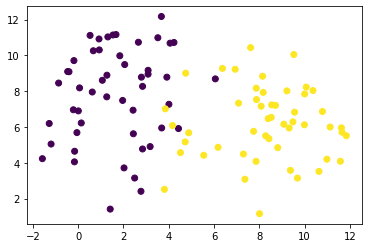

In [3]:
(X,y) =  make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=2.05,random_state=20)
plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.show()

In [4]:
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device).view(-1, 1)

In [5]:
def book_keeping(model,epoch,cost):
    
    logits = model(X)
    predicted = (logits > 0.5).float().view(-1)
    acc = torch.sum(predicted == y.view(-1)).float() / 100    
    print("Epoch = {},Cost = {:.3f},Accuracy = {:.3f}".format(epoch,cost,acc))

In [6]:
class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.fc1 = torch.nn.Linear(num_features, 1)
        
        self.fc1.weight.detach().zero_()
        self.fc1.bias.detach().zero_()
        
    def forward(self, x):
        return torch.sigmoid(self.fc1(x))

In [6]:
model_auto = LogisticRegression(num_features=2).to(device)
optimizer = torch.optim.SGD(model_auto.parameters(), lr=0.01, weight_decay=LAMBDA)
loss = torch.nn.BCELoss()

In [8]:
for epoch in range(100):
    
    out = model_auto(X)
    cost = loss(out, y)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    book_keeping(model_auto,epoch,cost.item())

print('\nWeights = {}\nBias = {}'.format(model_auto.fc1.weight,model_auto.fc1.bias))

Epoch = 0,Cost = 0.693,Accuracy = 0.770
Epoch = 1,Cost = 0.665,Accuracy = 0.790
Epoch = 2,Cost = 0.641,Accuracy = 0.800
Epoch = 3,Cost = 0.619,Accuracy = 0.830
Epoch = 4,Cost = 0.600,Accuracy = 0.860
Epoch = 5,Cost = 0.582,Accuracy = 0.870
Epoch = 6,Cost = 0.566,Accuracy = 0.880
Epoch = 7,Cost = 0.552,Accuracy = 0.880
Epoch = 8,Cost = 0.539,Accuracy = 0.890
Epoch = 9,Cost = 0.527,Accuracy = 0.900
Epoch = 10,Cost = 0.516,Accuracy = 0.900
Epoch = 11,Cost = 0.505,Accuracy = 0.900
Epoch = 12,Cost = 0.496,Accuracy = 0.900
Epoch = 13,Cost = 0.487,Accuracy = 0.900
Epoch = 14,Cost = 0.479,Accuracy = 0.900
Epoch = 15,Cost = 0.471,Accuracy = 0.900
Epoch = 16,Cost = 0.464,Accuracy = 0.900
Epoch = 17,Cost = 0.457,Accuracy = 0.890
Epoch = 18,Cost = 0.451,Accuracy = 0.890
Epoch = 19,Cost = 0.445,Accuracy = 0.890
Epoch = 20,Cost = 0.440,Accuracy = 0.900
Epoch = 21,Cost = 0.435,Accuracy = 0.900
Epoch = 22,Cost = 0.430,Accuracy = 0.900
Epoch = 23,Cost = 0.425,Accuracy = 0.900
Epoch = 24,Cost = 0.421,Ac

In [9]:
model_manual = LogisticRegression(num_features=2).to(device)
optimizer = torch.optim.SGD(model_manual.parameters(), lr=0.01)

In [10]:
for epoch in range(100):
    
    out = model_manual(X)
    cost = loss(out, y)
    cost = cost + 0.5 * LAMBDA * torch.mm(model_manual.fc1.weight,
                                          model_manual.fc1.weight.t())
    cost = cost + 0.5 * LAMBDA * model_manual.fc1.bias**2
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    book_keeping(model_manual,epoch,cost.item())

print('\nWeights = {}\nBias = {}'.format(model_manual.fc1.weight,model_manual.fc1.bias))

Epoch = 0,Cost = 0.693,Accuracy = 0.770
Epoch = 1,Cost = 0.665,Accuracy = 0.790
Epoch = 2,Cost = 0.642,Accuracy = 0.800
Epoch = 3,Cost = 0.621,Accuracy = 0.830
Epoch = 4,Cost = 0.603,Accuracy = 0.860
Epoch = 5,Cost = 0.588,Accuracy = 0.870
Epoch = 6,Cost = 0.574,Accuracy = 0.880
Epoch = 7,Cost = 0.561,Accuracy = 0.880
Epoch = 8,Cost = 0.550,Accuracy = 0.890
Epoch = 9,Cost = 0.540,Accuracy = 0.900
Epoch = 10,Cost = 0.531,Accuracy = 0.900
Epoch = 11,Cost = 0.524,Accuracy = 0.900
Epoch = 12,Cost = 0.516,Accuracy = 0.900
Epoch = 13,Cost = 0.510,Accuracy = 0.900
Epoch = 14,Cost = 0.504,Accuracy = 0.900
Epoch = 15,Cost = 0.499,Accuracy = 0.900
Epoch = 16,Cost = 0.494,Accuracy = 0.900
Epoch = 17,Cost = 0.490,Accuracy = 0.890
Epoch = 18,Cost = 0.486,Accuracy = 0.890
Epoch = 19,Cost = 0.482,Accuracy = 0.890
Epoch = 20,Cost = 0.479,Accuracy = 0.900
Epoch = 21,Cost = 0.476,Accuracy = 0.900
Epoch = 22,Cost = 0.473,Accuracy = 0.900
Epoch = 23,Cost = 0.471,Accuracy = 0.900
Epoch = 24,Cost = 0.469,Ac

# Dropout

In [1]:
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
import numpy as np
np.random.seed(6)
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

import math
LAMBDA = 2
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
(X,y) =  make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=2.05,random_state=20)
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device).view(-1, 1)

seed = 7

In [2]:
class LR_DROP(torch.nn.Module):

    def __init__(self, num_features):
        super(LR_DROP, self).__init__()
        self.fc1 = torch.nn.Linear(num_features, 8)
        self.fc2 = torch.nn.Linear(8, 1)
        
        
    def forward(self, x):
        
        x = self.fc1(x)
        print("Before dropout")
        print(x)
        x = F.dropout(x, p=0.5)
        print("After dropout")
        print(x)
        
        x = self.fc2(x)
        
        return torch.sigmoid(x)

In [3]:
torch.manual_seed(seed)
model_drop = LR_DROP(num_features=2).to(device)

In [4]:
optimizer_d = torch.optim.SGD(model_drop.parameters(), lr=0.01)
loss = torch.nn.BCELoss()

In [5]:
for epoch in range(1):
    
    md = model_drop(X[:1])
    cost_m = loss(md,y[:1])
    
    optimizer_d.zero_grad()
    cost_m.backward()
    optimizer_d.step()

Before dropout
tensor([[-1.1715,  0.6772, -0.4953, -0.7122,  2.0020,  1.1622, -1.7910, -0.6215]],
       grad_fn=<AddmmBackward>)
After dropout
tensor([[-0.0000, 1.3545, -0.0000, -0.0000, 0.0000, 2.3245, -0.0000, -0.0000]],
       grad_fn=<MulBackward0>)


In [9]:
0.6772 * (1/0.5) --> 1/(1-p) here p = 0.5

1.3544

In [10]:
1.1622 * (1/0.5)

2.3244

# Normalization

In [2]:
from torch.autograd import Variable

In [14]:
X = torch.randn(4, 5)
X

tensor([[ 0.2119,  0.4781,  0.5835,  1.4480,  0.2817],
        [ 0.6824,  0.3896, -2.1601,  2.9554, -0.1126],
        [-1.4871,  0.5986, -0.4496,  1.6792,  0.4368],
        [ 0.6371, -0.1796, -0.8175, -0.4275, -0.9538]])

In [15]:
B = torch.nn.BatchNorm1d(5, affine=False)
y = B(X)
y

tensor([[ 0.2272,  0.5235,  1.3185,  0.0283,  0.6838],
        [ 0.7592,  0.2274, -1.4761,  1.2760, -0.0475],
        [-1.6943,  0.9268,  0.2662,  0.2197,  0.9717],
        [ 0.7079, -1.6777, -0.1085, -1.5240, -1.6081]])

In [16]:
output_m = Variable(X)

mu = torch.mean(output_m,axis=0)  
var_ = torch.var(output_m, unbiased=False,axis=0)
sigma = torch.sqrt(var_ + 1e-5)
out = (output_m - mu)/sigma

out

tensor([[ 0.2272,  0.5235,  1.3185,  0.0283,  0.6838],
        [ 0.7592,  0.2274, -1.4761,  1.2760, -0.0475],
        [-1.6943,  0.9268,  0.2662,  0.2197,  0.9717],
        [ 0.7079, -1.6777, -0.1085, -1.5240, -1.6081]])

In [17]:
torch.mean(output_m,axis=0)

tensor([ 0.0111,  0.3217, -0.7109,  1.4138, -0.0870])

In [18]:
torch.var(output_m, unbiased=False,axis=0)

tensor([0.7819, 0.0893, 0.9638, 1.4596, 0.2906])

In [19]:
torch.sqrt(var_ + 1e-5)

tensor([0.8842, 0.2988, 0.9817, 1.2082, 0.5391])

Layer Norm

In [38]:
X

tensor([[ 0.2119,  0.4781,  0.5835,  1.4480,  0.2817],
        [ 0.6824,  0.3896, -2.1601,  2.9554, -0.1126],
        [-1.4871,  0.5986, -0.4496,  1.6792,  0.4368],
        [ 0.6371, -0.1796, -0.8175, -0.4275, -0.9538]])

In [39]:
L = torch.nn.LayerNorm(5)
y = L(X)
y

tensor([[-0.8752, -0.2759, -0.0387,  1.9080, -0.7182],
        [ 0.2023,  0.0236, -1.5330,  1.5900, -0.2830],
        [-1.5438,  0.4164, -0.5687,  1.4318,  0.2643],
        [ 1.7459,  0.2989, -0.8314, -0.1404, -1.0730]],
       grad_fn=<NativeLayerNormBackward>)

In [44]:
output_m = Variable(X)

mu = torch.mean(output_m,axis=1)  
var_ = torch.var(output_m, unbiased=False,axis=1)
sigma = torch.sqrt(var_ + 1e-5)
out = (output_m.T - mu)/sigma

out.T

tensor([[-0.8752, -0.2759, -0.0387,  1.9080, -0.7182],
        [ 0.2023,  0.0236, -1.5330,  1.5900, -0.2830],
        [-1.5438,  0.4164, -0.5687,  1.4318,  0.2643],
        [ 1.7459,  0.2989, -0.8314, -0.1404, -1.0730]])

In [31]:
torch.mean(output_m,axis=1)

tensor([ 0.6006,  0.3510,  0.1556, -0.3483])

In [32]:
torch.var(output_m, unbiased=False,axis=1)

tensor([0.1972, 2.6829, 1.1323, 0.3185])

In [33]:
torch.sqrt(torch.var(output_m, unbiased=False,axis=1) + 1e-5)

tensor([0.4441, 1.6380, 1.0641, 0.5644])

In [36]:
(0.4781 - 0.6006)/0.4441

-0.2758387750506643

Instance Norm

In [70]:
X = torch.randn(2, 5,3)
X

tensor([[[-0.1877,  0.4350, -0.3159],
         [-1.4015,  1.4348, -0.3522],
         [ 0.5299,  1.4537, -0.2811],
         [ 1.9917, -0.4859, -0.9589],
         [-0.1720,  1.1200,  0.0371]],

        [[-0.1600,  0.2946,  0.0730],
         [-1.2220,  0.4028,  1.4718],
         [-1.8032,  0.2423, -0.3687],
         [ 1.2520,  0.0510,  0.5131],
         [ 0.8930, -1.7271,  1.3287]]])

In [71]:
I = torch.nn.InstanceNorm1d(5)
y = I(X)
y

tensor([[[-0.5026,  1.3960, -0.8934],
         [-1.1062,  1.3162, -0.2100],
         [-0.0531,  1.2504, -1.1973],
         [ 1.3984, -0.5164, -0.8820],
         [-0.8836,  1.3980, -0.5144]],

        [[-1.2346,  1.2142,  0.0204],
         [-1.2998,  0.1673,  1.1325],
         [-1.3530,  1.0328,  0.3202],
         [ 1.3073, -1.1207, -0.1866],
         [ 0.5395, -1.4019,  0.8624]]])

In [122]:
l_mean = torch.Tensor()
test_mu = torch.mean(output_m,axis=2)

for i in range(2):
    out = torch.cat((test_mu[i],test_mu[i],test_mu[i]),axis=0).view(3,5).T
    l_mean = torch.cat((l_mean,out),axis=0)
l_mean = l_mean.view(2,5,3)

print(l_mean)

tensor([[[-0.0229, -0.0229, -0.0229],
         [-0.1063, -0.1063, -0.1063],
         [ 0.5675,  0.5675,  0.5675],
         [ 0.1823,  0.1823,  0.1823],
         [ 0.3284,  0.3284,  0.3284]],

        [[ 0.0692,  0.0692,  0.0692],
         [ 0.2175,  0.2175,  0.2175],
         [-0.6432, -0.6432, -0.6432],
         [ 0.6054,  0.6054,  0.6054],
         [ 0.1649,  0.1649,  0.1649]]])


In [123]:
l_var = torch.Tensor()
l_sigma = torch.Tensor()

test_var = torch.var(output_m, unbiased=False,axis=2)

for i in range(2):
    out = torch.cat((test_var[i],test_var[i],test_var[i]),axis=0).view(3,5).T
    l_var = torch.cat((l_var,out),axis=0)
    
    out = torch.sqrt(out + 1e-5)
    l_sigma = torch.cat((l_sigma,out),axis=0)
    
l_var = l_var.view(2,5,3)
print(l_var)

l_sigma = l_sigma.view(2,5,3)
print(l_sigma)

tensor([[[0.1076, 0.1076, 0.1076],
         [1.3710, 1.3710, 1.3710],
         [0.5023, 0.5023, 0.5023],
         [1.6742, 1.6742, 1.6742],
         [0.3207, 0.3207, 0.3207]],

        [[0.0345, 0.0345, 0.0345],
         [1.2265, 1.2265, 1.2265],
         [0.7350, 0.7350, 0.7350],
         [0.2447, 0.2447, 0.2447],
         [1.8214, 1.8214, 1.8214]]])
tensor([[[0.3280, 0.3280, 0.3280],
         [1.1709, 1.1709, 1.1709],
         [0.7087, 0.7087, 0.7087],
         [1.2939, 1.2939, 1.2939],
         [0.5663, 0.5663, 0.5663]],

        [[0.1856, 0.1856, 0.1856],
         [1.1075, 1.1075, 1.1075],
         [0.8573, 0.8573, 0.8573],
         [0.4947, 0.4947, 0.4947],
         [1.3496, 1.3496, 1.3496]]])


In [126]:
(output_m - l_mean)/l_sigma

tensor([[[-0.5026,  1.3960, -0.8934],
         [-1.1062,  1.3162, -0.2100],
         [-0.0531,  1.2504, -1.1973],
         [ 1.3984, -0.5164, -0.8820],
         [-0.8836,  1.3980, -0.5144]],

        [[-1.2346,  1.2142,  0.0204],
         [-1.2998,  0.1673,  1.1325],
         [-1.3530,  1.0328,  0.3202],
         [ 1.3073, -1.1207, -0.1866],
         [ 0.5395, -1.4019,  0.8624]]])

In [128]:
input = torch.randn(20, 6, 10, 10)
# Separate 6 channels into 3 groups
m = torch.nn.GroupNorm(3, 6)
# Separate 6 channels into 6 groups (equivalent with InstanceNorm)
m = torch.nn.GroupNorm(6, 6)
# Put all 6 channels into a single group (equivalent with LayerNorm)
m = torch.nn.GroupNorm(1, 6)
# Activating the module
output = m(input)
output

tensor([[[[-0.6801,  0.8050, -0.2375,  ...,  0.2672, -0.8491, -1.9923],
          [-0.2956,  0.6626, -2.6632,  ..., -0.1351, -0.5720,  1.3682],
          [-0.0611, -1.6135, -1.3958,  ...,  0.4588, -0.1706, -0.4495],
          ...,
          [-0.7846,  0.3523, -0.8959,  ...,  1.4718, -1.7232,  0.1926],
          [-0.9958, -2.4813, -0.7849,  ..., -0.4490,  1.3360,  0.1663],
          [ 1.2332,  0.4977, -0.3982,  ...,  2.4332, -0.2299,  0.9321]],

         [[-0.6449, -0.2827, -0.8080,  ..., -1.1808, -0.3174, -0.7104],
          [-0.9114, -1.2741, -1.1681,  ...,  0.4044,  1.3290, -1.3337],
          [-0.3594,  0.1920, -0.7111,  ..., -0.9584,  1.6782, -1.0826],
          ...,
          [-1.2291,  0.5288,  1.3412,  ..., -0.8062,  0.7689,  0.1069],
          [ 1.2782, -0.5982, -1.3812,  ..., -0.6342, -0.9582, -0.0155],
          [-0.0698, -0.3404,  1.3291,  ..., -0.5399,  0.0525, -1.3264]],

         [[-0.7466, -1.7264,  1.0393,  ...,  0.0214, -0.2886, -1.5610],
          [ 1.1086,  0.2539, -

feature map

In [7]:
import torch as t
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import torch.nn.functional as F
from datetime import datetime
from torch.autograd import Variable
from torchvision.utils import save_image
import imageio
import os
import math
seed = 7
device = t.device('cuda:0' if t.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [8]:
transform = tv.transforms.Compose([tv.transforms.ToTensor()])

train_data = tv.datasets.CIFAR10("data/train",train=True, download=True, transform = transform)
test_data = tv.datasets.CIFAR10("data/test",train=False,download=True,transform=transform)

# kwargs = {'num_workers': 10, 'pin_memory': True} # GPU
kwargs = {} # CPU
batch_size = 32

train_loader = t.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True,**kwargs)
test_loader = t.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True,**kwargs)

Files already downloaded and verified
Files already downloaded and verified


In [9]:
class RandomModel(t.nn.Module):
    
    def __init__(self):
        super(RandomModel,self).__init__()
        self.conv1 = t.nn.Conv2d(3,32,3,1)
        self.conv2 = t.nn.Conv2d(32,64,3,1)
        self.fc1 = t.nn.Linear(64*28*28,128)
        self.fc2 = t.nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        
        x = x.view(x.shape[0],64*28*28)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x
    
t.manual_seed(seed)
model = RandomModel().to(device)

In [10]:
model.conv1

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))

In [11]:
model.conv1.weight[0]

tensor([[[ 0.0134, -0.1159,  0.0613],
         [ 0.0604, -0.1029, -0.0288],
         [-0.1127,  0.0499, -0.0518]],

        [[ 0.1352,  0.1366,  0.0196],
         [-0.0820, -0.1130, -0.0211],
         [-0.0542,  0.0848, -0.1643]],

        [[ 0.1809, -0.1510,  0.1474],
         [-0.0334,  0.0990,  0.0750],
         [ 0.0081,  0.0359,  0.1461]]], grad_fn=<SelectBackward>)

In [12]:
sampleX,sampleY = iter(train_loader).next()
print("The sample data shape is ",sampleX.shape,sampleY.shape)

The sample data shape is  torch.Size([32, 3, 32, 32]) torch.Size([32])


In [13]:
sampleX[0:1].shape

torch.Size([1, 3, 32, 32])

In [14]:
feature_maps = model.conv1(sampleX[0:1])
feature_maps.shape

torch.Size([1, 32, 30, 30])

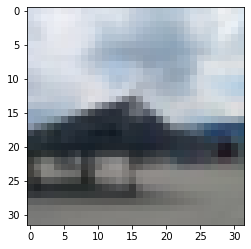

In [15]:
plt.imshow(sampleX[0].detach().numpy().transpose([1,2,0]))

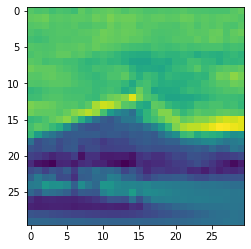

In [16]:
plt.imshow(feature_maps[0][0].detach().numpy())

In [31]:
class RandomModel(t.nn.Module):
    
    def __init__(self):
        super(RandomModel,self).__init__()
        
        self.shared = t.nn.Sequential(
            t.nn.Linear(64*28*28,128),
            t.nn.ReLU(),
            t.nn.Linear(128,10)
        )
        
        self.model1 = t.nn.Sequential(
            t.nn.Conv2d(3,32,3,1),
            t.nn.ReLU(),
            t.nn.Conv2d(32,64,3,1),
            t.nn.ReLU()
            
        )
        
        self.model2 = t.nn.Sequential(
            t.nn.Conv2d(3,16,3,1),
            t.nn.ReLU(),
            t.nn.Conv2d(16,32,3,1),
            t.nn.ReLU(),
            t.nn.Conv2d(32,64,1,1),
            t.nn.ReLU()
        )
        
    def forward(self,x):
        
        m1 = self.model1(x)
        m1 = m1.view(m1.shape[0],64*28*28)
        m1 = self.shared(m1)
        
        m2 = self.model2(x)
        m2 = m2.view(m2.shape[0],64*28*28)
        m2 = self.shared(m2)
        
        
        return m1,m2


In [32]:
t.manual_seed(seed)
model = RandomModel().to(device)

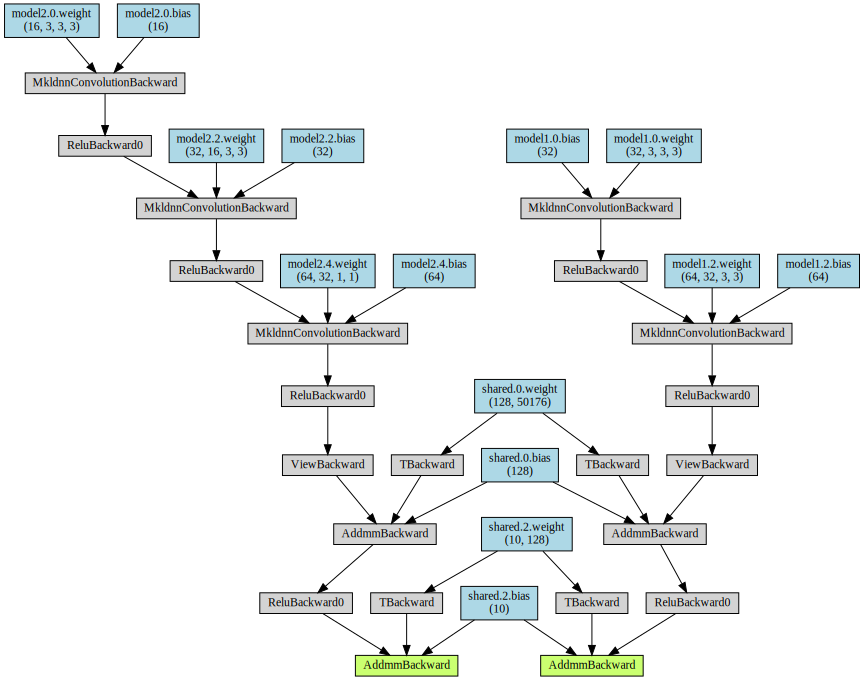

In [33]:
from torchviz import make_dot
from datetime import datetime
make_dot(model(sampleX[:2]), params=dict(model.named_parameters()))

In [34]:
learning_rate = 1e-2
momentum = 0.5
criterion = t.nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model.parameters(),lr=learning_rate,momentum=momentum)
train_losses,test_losses,train_accs,test_accs = [],[],[],[]

In [45]:
def book_keeping(epoch,time,model):
    
    train_correct_predictions = 0
    test_correct_predictions = 0
    train_epoch_loss = 0
    test_epoch_loss = 0

    for batchX,batchY in iter(train_loader):
        
        batchX, batchY = batchX.to(device), batchY.to(device)
        
        m1,m2 = model(batchX)
        loss1 = criterion(m1,batchY)
        loss2 = criterion(m2,batchY)

        total_loss = loss1+loss2
        train_epoch_loss += total_loss.item()

        predictions = t.argmax(m1.data, 1)
        train_correct_predictions+= (predictions == batchY).sum().item()
        
        predictions = t.argmax(m2.data, 1)
        train_correct_predictions+= (predictions == batchY).sum().item()
        
        
    for batchX,batchY in iter(test_loader):
        batchX, batchY = batchX.to(device), batchY.to(device)

        m1,m2 = model(batchX)
        loss1 = criterion(m1,batchY)
        loss2 = criterion(m2,batchY)

        total_loss = loss1+loss2
        test_epoch_loss += total_loss.item()
        
        predictions = t.argmax(m1.data, 1)
        test_correct_predictions+= (predictions == batchY).sum().item()
        
        predictions = t.argmax(m2.data, 1)
        test_correct_predictions+= (predictions == batchY).sum().item()
        
      
    train_acc = (train_correct_predictions / 2*(len(train_loader)*32)) * 100
    test_acc = (test_correct_predictions / 2*(len(test_loader)*32)) * 100
    
    print('Epoch = {}, Time = {}, Train Loss: {:.2f}, Test Loss: {:.2f}, Train Accuracy: {:.2f}%,Test Accuracy: {:.2f}%'.format(epoch + 1, time, train_epoch_loss,test_epoch_loss,train_acc,test_acc))
    
    train_losses.append(train_epoch_loss)
    test_losses.append(test_epoch_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

In [ ]:
for i in range(5):
    start = datetime.now()
    
    for batchX,batchY in iter(train_loader):

        batchX, batchY = batchX.to(device), batchY.to(device)

        optimizer.zero_grad()
        m1,m2 = model(batchX)
        loss1 = criterion(m1,batchY)
        loss2 = criterion(m2,batchY)

        total_loss = loss1+loss2
        total_loss.backward()
        optimizer.step()

        end = datetime.now()
        time = (end-start).total_seconds()
        book_keeping(i,time,model)

Epoch = 1, Time = 0.884172, Train Loss: 7205.68, Test Loss: 1442.88, Train Accuracy: 27508800000.00%,Test Accuracy: 1096752000.00%
Epoch = 1, Time = 346.079493, Train Loss: 7208.84, Test Loss: 1443.52, Train Accuracy: 26776065600.00%,Test Accuracy: 1070209600.00%
Epoch = 1, Time = 679.055593, Train Loss: 7206.69, Test Loss: 1443.10, Train Accuracy: 28136500800.00%,Test Accuracy: 1120790400.00%
Epoch = 1, Time = 1011.309355, Train Loss: 7214.95, Test Loss: 1444.53, Train Accuracy: 25193059200.00%,Test Accuracy: 1008611200.00%
Epoch = 1, Time = 1343.021647, Train Loss: 7211.70, Test Loss: 1443.87, Train Accuracy: 25113033600.00%,Test Accuracy: 1005606400.00%
Epoch = 1, Time = 1671.744606, Train Loss: 7203.66, Test Loss: 1442.30, Train Accuracy: 27336244800.00%,Test Accuracy: 1094748800.00%
Epoch = 1, Time = 2001.343953, Train Loss: 7197.36, Test Loss: 1441.09, Train Accuracy: 28504118400.00%,Test Accuracy: 1140321600.00%
Epoch = 1, Time = 2330.959105, Train Loss: 7199.63, Test Loss: 1441

Epoch = 1, Time = 20453.438345, Train Loss: 6984.10, Test Loss: 1398.72, Train Accuracy: 41298211200.00%,Test Accuracy: 1650636800.00%
Epoch = 1, Time = 20781.753327, Train Loss: 6969.25, Test Loss: 1395.73, Train Accuracy: 43516420800.00%,Test Accuracy: 1760312000.00%
Epoch = 1, Time = 21112.765425, Train Loss: 6966.69, Test Loss: 1394.92, Train Accuracy: 40960603200.00%,Test Accuracy: 1652640000.00%
Epoch = 1, Time = 21442.823337, Train Loss: 6967.41, Test Loss: 1395.13, Train Accuracy: 42428572800.00%,Test Accuracy: 1697211200.00%
Epoch = 1, Time = 21770.367745, Train Loss: 6963.31, Test Loss: 1394.16, Train Accuracy: 40027804800.00%,Test Accuracy: 1597051200.00%
Epoch = 1, Time = 22099.726408, Train Loss: 6950.98, Test Loss: 1391.86, Train Accuracy: 37171891200.00%,Test Accuracy: 1512416000.00%
Epoch = 1, Time = 22427.600073, Train Loss: 6943.28, Test Loss: 1390.45, Train Accuracy: 33560736000.00%,Test Accuracy: 1360673600.00%
Epoch = 1, Time = 22757.455504, Train Loss: 6960.97, Te

In [40]:
class block1(t.nn.Module):
    def __init__(self,ni):
        super(block1, self).__init__()
        self.conv1 = t.nn.Conv2d(ni, ni, 1)
        self.conv2 = t.nn.Conv2d(ni, ni, 3, 1, 1)
        self.classifier = t.nn.Linear(ni*24*24,751)

    def forward(self,x):
        residual = x
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        
        out += residual
        
        out = out.view(out.size(0),-1)
        return self.classifier(out)

block = block1(16)
x = t.randn(1, 16, 24, 24)
output = block(x)

In [42]:
block

block1(
  (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (classifier): Linear(in_features=9216, out_features=751, bias=True)
)

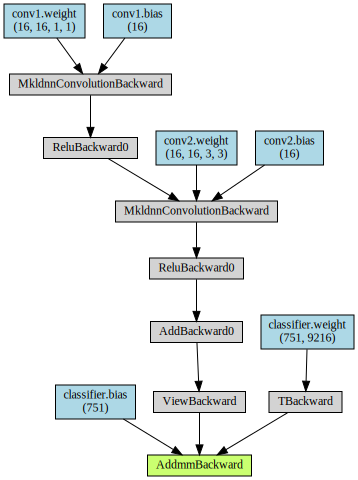

In [44]:
make_dot(block(x), params=dict(block.named_parameters()))